# Introduction
In this assignment, you are getting familiar to the tools including Python, numpy, matplotlib, pandas, and Jupyter notebook. Search for data one for classification and one for regression from any data source. The data should to be large enough more than 10,000 samples and more than 10 feature values.

# Review
Linear algebra is imperative in the field of machine learning and its usage ranges from notations used to describe the operation of algorithms to implementation of algorithms in code. Some important Linear algebra concepts essential for understanding Machine learning are discussed below.

## Linear algebra
    1) Scalars
    2) Vectors
    3) Matrices
       Important operations on Matrices:
       - Transpose
       - Multiplying Matrices
         > Cross product
         > Dot product
       Properties of Matrix product operations
       - Matrix multiplication is distributive: A(B + C) = AB + AC
       - It is associative: A(BC) = (AB)C
       - Matrix multiplication is not commutative : AB = BA is not always true
       - Dot product between two vectors is commutative: xTy = yx
       - The transpose of a matrix product has a simple form:(AB)= BA
       Identity Matrices:
       
       
       Inverse Matrices:
       
       Linear Dependence:
       
       Span of a set of vectors:
       
       Norms:
       
       A unit vector is a vector with unit norm:||x||2= 1
       - Euclidean norm
       - Frobenius norm
       
       Diagonal Matrix
       
       Symmetric Matrix
       
       Orthogonal Matrix
       
    4) Tensors
    5) Eigendecomposition
    
       An eigenvector of a square matrix A is a nonzero vector v such that multiplication by A alters only the scale
       of v:
       Av = λv
       
       Eigenvalue
       
       The eigendecomposition of A is then given by 
       
    6) Singular Value Decomposition
       The singular value decomposition(SVD) provides another way to factorize a matrix, into singular vectors and
       singular values
    
    The Moore-Penrose Pseudoinverse
    
    The Trace Operator
    
    The Determinant
    
    Principal Components Analysis
    
    




## Probability Theory

why probability
frequentist probability
Bayesian probability

Random Variables

Probability Distributions

Discrete Variables and Probability Mass Functions

Continuous Variables and Probability Density Functions

Marginal Probability

Conditional Probability

The Chain Rule of Conditional Probabilities

Independence and Conditional Independence

Expectation, Variance and Covariance

Common Probability Distributions

 - Bernoulli Distribution
 
 - multinoulli/Categorical distribution
 
 - Gaussian Distribution
 
 - Exponential and Laplace Distributions
 
 - The Dirac Distribution and Empirical Distribution
 
 - Mixtures of Distributions
 
Useful Properties of Common Functions

 - logistic sigmoid
 
 - softplus function
 
Bayes’ Rule

measure theory

Jacobian Matrix

### Information Theory

diﬀerential entropy

Kullback-Leibler (KL) divergence

cross-entropy

Structured Probabilistic Models

 - Directed models
 
 - Undirected models

numerical methods





# Data
Introduce your data and visualize them. Describe your observations about the data.

### Introduction of data for regression & source


## Linear Regression

### Reading the file
    1.We read the csv file into pandas DataFrame
    2.We then check the size of the DataFrame.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Read the csv data for regression.
atletes_raw = pd.read_csv('athlete_events.csv',delimiter=',')

# check the size of the data before preprocessing
size_raw = atletes_raw.shape
print("The size of the original data frame w/o pre-processing",size_raw)

The size of the original data frame w/o pre-processing (271116, 15)


### Data Preprocessing
    1. Check if there are any NaN's in the dataset if yes perform data imputation
    2. Perform Data Transformation and Data Modification on the dataset for vizualization.

In [5]:
atletes_raw.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### Replace Medal N/A with NoMedal 

In [6]:
atletes_raw['Medal'].fillna('NoMedal',inplace=True)

#### Find the mean of all the samples for `Age,Height,Sex`

In [7]:
colMean = ["Age","Height","Weight"]
mean = atletes_raw[colMean].mean(axis=0) #along columns.
round(mean)

Age        26.0
Height    175.0
Weight     71.0
dtype: float64

#### Replace the mean of all the samples for `Age,Height,Sex`

In [8]:
atletes_raw.fillna(round(mean),inplace=True);

#### Verify all coulms have data

In [9]:
atletes_raw.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [10]:
#len(atletes_raw.Age.unique())
#len(atletes_raw.NOC.unique())

#Get all the medal
TotalMedalTally = atletes_raw[atletes_raw["Medal"] != 'NoMedal']
#TotalMedalTally.Medal.unique()
TotalGold = TotalMedalTally[TotalMedalTally['Medal'] == 'Gold'].groupby('NOC').apply(lambda x:x['Medal'].count())
TotalSilver = TotalMedalTally[TotalMedalTally['Medal'] == 'Silver'].groupby('NOC').apply(lambda x:x['Medal'].count())
TotalBronze = TotalMedalTally[TotalMedalTally['Medal'] == 'Bronze'].groupby('NOC').apply(lambda x:x['Medal'].count())
TotalMedal = pd.concat([TotalGold,TotalSilver,TotalBronze],axis=1,sort=True)
TotalMedal.fillna(0,inplace=True)
Top50Medal = TotalMedal.sort_values(0,ascending=False).head(50)
Top50Medal.columns = ['Gold','Silver','Bronze']
Top50Medal

,Gold,Silver,Bronze
USA,2638.0,1641.0,1358.0
URS,1082.0,732.0,689.0
GER,745.0,674.0,746.0
GBR,678.0,739.0,651.0
ITA,575.0,531.0,531.0
FRA,501.0,610.0,666.0
SWE,479.0,522.0,535.0
CAN,463.0,438.0,451.0
HUN,432.0,332.0,371.0
GDR,397.0,327.0,281.0


In [11]:
#Get all US data
#Medal Count per year basis (Summer / Winter)
UsaWinter = TotalMedalTally[(TotalMedalTally['NOC']=='USA') & (TotalMedalTally['Season']=='Winter')]
UsaSummer = TotalMedalTally[(TotalMedalTally['NOC']=='USA') & (TotalMedalTally['Season']=='Summer')]

# Medal tally during winter olympics for USA
UsaGoldWinter = UsaWinter[UsaWinter['Medal']=='Gold'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaSilverWinter = UsaWinter[UsaWinter['Medal']=='Silver'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaBronzeWinter = UsaWinter[UsaWinter['Medal']=='Bronze'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaTotalMedalWinter = pd.concat([UsaGoldWinter,UsaSilverWinter,UsaBronzeWinter],axis=1,sort=True)
UsaTotalMedalWinter.fillna(0,inplace=True)
# Medal tally during summer olympics for USA
UsaGoldSummer = UsaSummer[UsaSummer['Medal']=='Gold'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaSilverSummer= UsaSummer[UsaSummer['Medal']=='Silver'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaBronzeSummer = UsaSummer[UsaSummer['Medal']=='Bronze'].groupby('Year').apply(lambda x:x['Medal'].count())
UsaTotalMedalSummer = pd.concat([UsaGoldSummer,UsaSilverSummer,UsaBronzeSummer],axis=1,sort=True)
UsaTotalMedalSummer.fillna(0,inplace=True)

#Men / Women 
#Summer
UsaMenSummer = UsaSummer[UsaSummer['Sex'] == "M"].groupby('Year').apply(lambda x:x['Sex'].count())
UsaWomenSummer = UsaSummer[UsaSummer['Sex'] == "F"].groupby('Year').apply(lambda x:x['Sex'].count())
#Winter
UsaMenSummer = UsaWinter[UsaWinter['Sex'] == "M"].groupby('Year').apply(lambda x:x['Sex'].count())
UsaWomenSummer = UsaWinter[UsaWinter['Sex'] == "F"].groupby('Year').apply(lambda x:x['Sex'].count())

#Summer
UsaSummerMedalGames = UsaSummer.groupby('Year').apply(lambda x:x['Event'].value_counts())
#Winter
UsaWinterMedalGames = UsaWinter.groupby('Year').apply(lambda x:x['Event'].value_counts())

In [12]:
#Get all Soviet Union data now called Russia
#Medal Count per year basis (Summer / Winter)
RusWinter = TotalMedalTally[((TotalMedalTally['NOC']=='URS') | (TotalMedalTally['NOC']=='RUS')) 
                            & (TotalMedalTally['Season']=='Winter')]
RusSummer = TotalMedalTally[((TotalMedalTally['NOC']=='URS') | (TotalMedalTally['NOC']=='RUS'))
                            & (TotalMedalTally['Season']=='Summer')]

# Medal tally during winter olympics for USA
RusGoldWinter = RusWinter[RusWinter['Medal']=='Gold'].groupby('Year').apply(lambda x:x['Medal'].count())
RusSilverWinter = RusWinter[RusWinter['Medal']=='Silver'].groupby('Year').apply(lambda x:x['Medal'].count())
RusBronzeWinter = RusWinter[RusWinter['Medal']=='Bronze'].groupby('Year').apply(lambda x:x['Medal'].count())
RusTotalMedalWinter = pd.concat([RusGoldWinter,RusSilverWinter,RusBronzeWinter],axis=1,sort=True)
RusTotalMedalWinter.columns = ['Gold','Silver','Bronze']
RusTotalMedalWinter.fillna(0,inplace=True)
# Medal tally during summer olympics for USA
RusGoldSummer = RusSummer[RusSummer['Medal']=='Gold'].groupby('Year').apply(lambda x:x['Medal'].count())
RusSilverSummer= RusSummer[RusSummer['Medal']=='Silver'].groupby('Year').apply(lambda x:x['Medal'].count())
RusBronzeSummer = RusSummer[RusSummer['Medal']=='Bronze'].groupby('Year').apply(lambda x:x['Medal'].count())
RusTotalMedalSummer = pd.DataFrame(pd.concat([RusGoldSummer,RusSilverSummer,RusBronzeSummer],axis=1,sort=True))
RusTotalMedalSummer.columns = ['Gold','Silver','Bronze']
RusTotalMedalSummer.fillna(0,inplace=True)

#Men / Women 
#Summer
RusMenSummer = RusSummer[RusSummer['Sex'] == "M"].groupby('Year').apply(lambda x:x['Sex'].count())
RusWomenSummer = RusSummer[RusSummer['Sex'] == "F"].groupby('Year').apply(lambda x:x['Sex'].count())
RusMWSummer = pd.concat([RusMenSummer,RusWomenSummer],axis=1)
RusMWSummer.columns = ['Men','Women']
#Winter
RusMenWinter = RusWinter[RusWinter['Sex'] == "M"].groupby('Year').apply(lambda x:x['Sex'].count())
RusWomenWinter = RusWinter[RusWinter['Sex'] == "F"].groupby('Year').apply(lambda x:x['Sex'].count())
RusMWWinter = pd.concat([RusMenWinter,RusWomenWinter],axis=1)
RusMWWinter.columns = ['Men','Women']

#Summer
RusSummerGoldMedalAge = (RusSummer[RusSummer['Medal']=='Gold']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusSummerGoldMedalAge.columns = ['Year','Age','Count']
RusSummerSilverMedalAge = (RusSummer[RusSummer['Medal']=='Silver']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusSummerSilverMedalAge.columns = ['Year','Age','Count']
RusSummerBronzeMedalAge = (RusSummer[RusSummer['Medal']=='Bronze']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusSummerBronzeMedalAge.columns = ['Year','Age','Count']

#Winter
RusWinterGoldMedalAge = (RusWinter[RusWinter['Medal']=='Gold']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusWinterGoldMedalAge.columns = ['Year','Age','Count']
RusWinterSilverMedalAge = (RusWinter[RusWinter['Medal']=='Silver']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusWinterSilverMedalAge.columns = ['Year','Age','Count']
RusWinterBronzeMedalAge = (RusWinter[RusWinter['Medal']=='Bronze']
                         .groupby('Year')
                         .apply(lambda x:x['Age'].value_counts())).reset_index(level=[0,1])
RusWinterBronzeMedalAge.columns = ['Year','Age','Count']


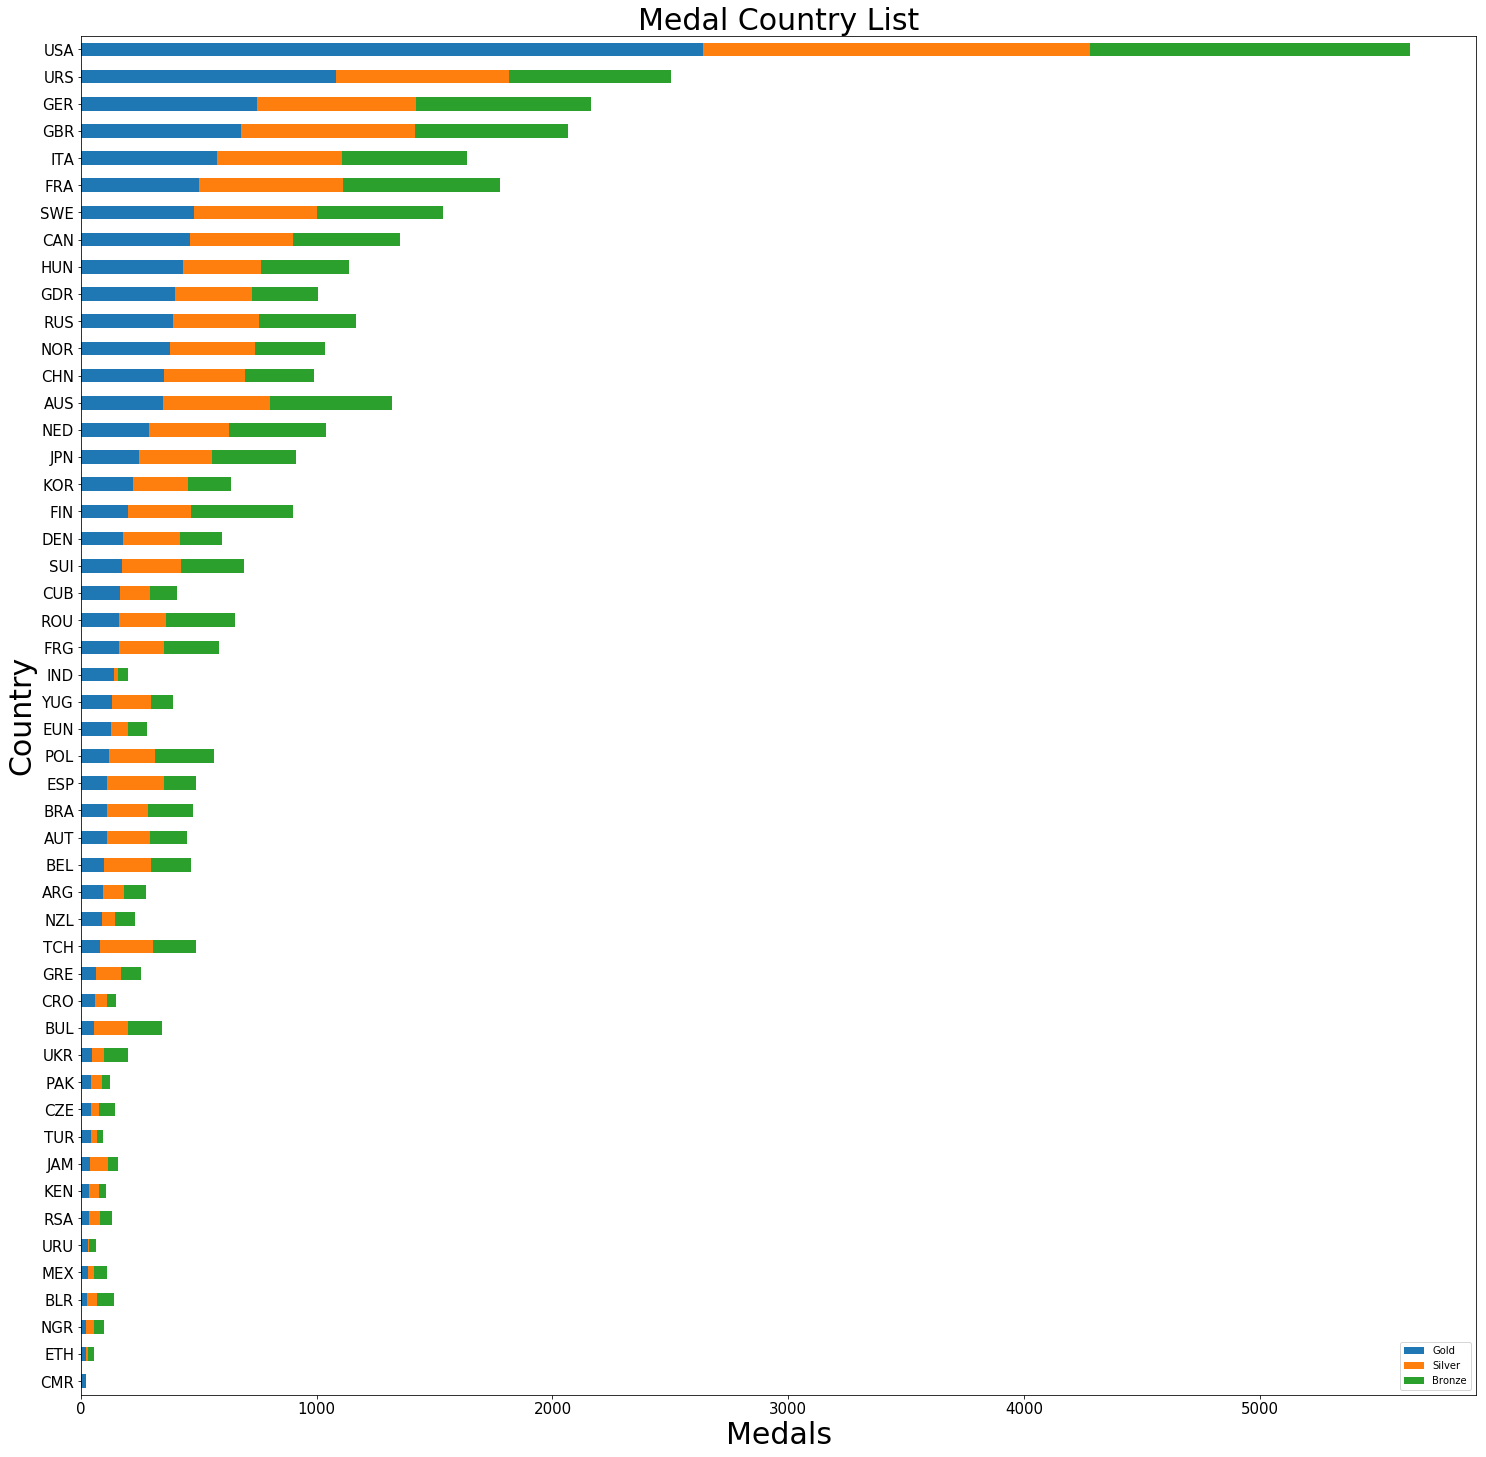

In [13]:
Top50Medal.sort_values('Gold').plot(kind='barh',stacked=True,figsize=(25,25),fontsize=15)
plot.title('Medal Country List',fontsize=30)
plot.ylabel("Country",fontsize=30)
plot.xlabel("Medals",fontsize=30)
plot.show()

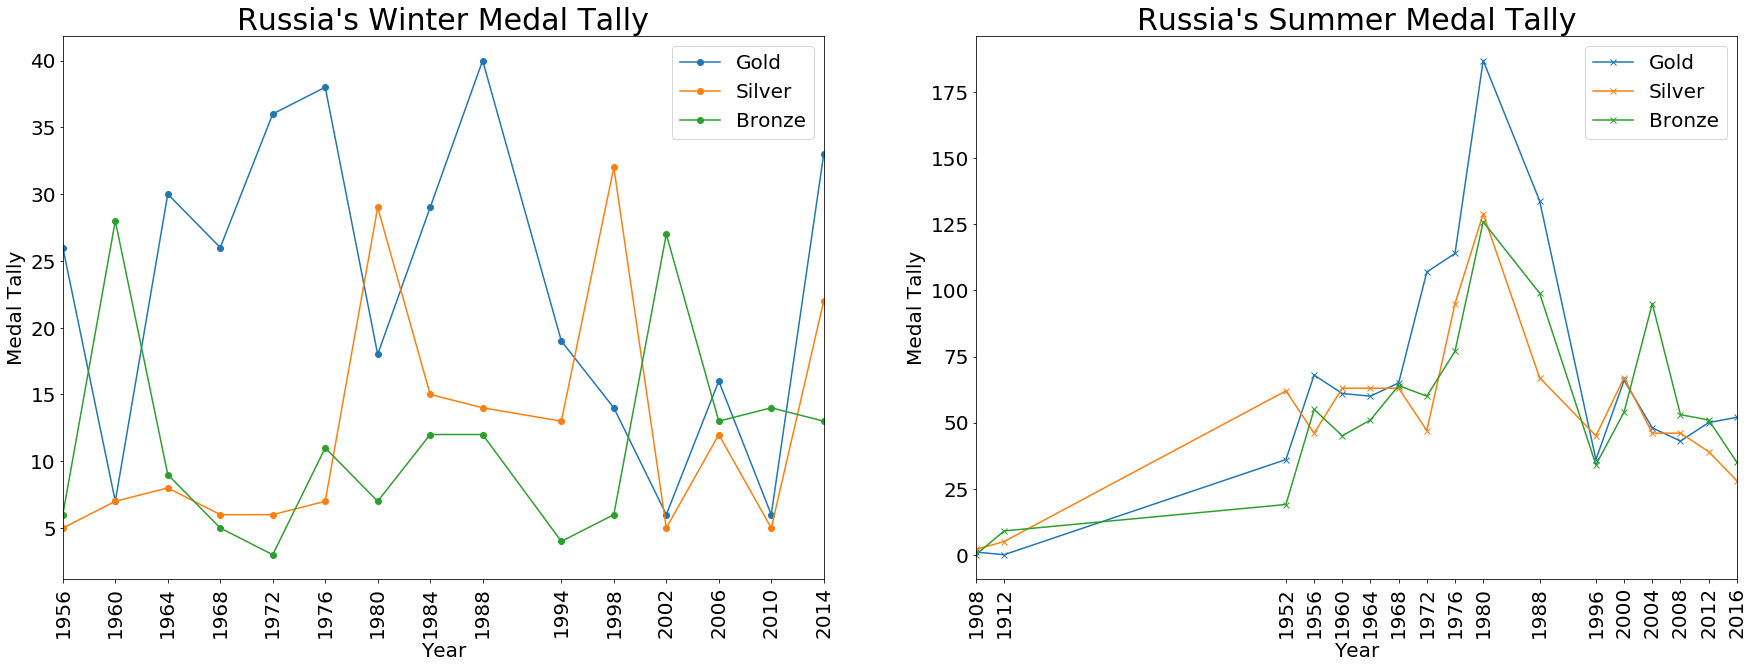

In [14]:
RusTotalMedalWinter.plot(kind='line',
                         ax=plot.subplot(1,2,1),
                         figsize=(30,10),
                         xticks=RusTotalMedalWinter.index,
                         fontsize=20,
                         marker='o',
                         rot='vertical',
                         legend=True)
plot.title("Russia's Winter Medal Tally",fontsize=30)
plot.ylabel("Medal Tally",fontsize=20)
plot.xlabel("Year",fontsize=20)
plot.legend(loc=1,prop={'size': 20})


RusTotalMedalSummer.plot(kind='line',
                         ax=plot.subplot(1,2,2),
                         xticks=RusTotalMedalSummer.index,
                         fontsize=20,
                         figsize=(30,10),
                         marker='x',
                         rot='vertical',
                         legend=True)
plot.title("Russia's Summer Medal Tally",fontsize=30)
plot.ylabel("Medal Tally",fontsize=20)
plot.xlabel("Year",fontsize=20)
plot.legend(loc=1,prop={'size': 20})
plot.show()

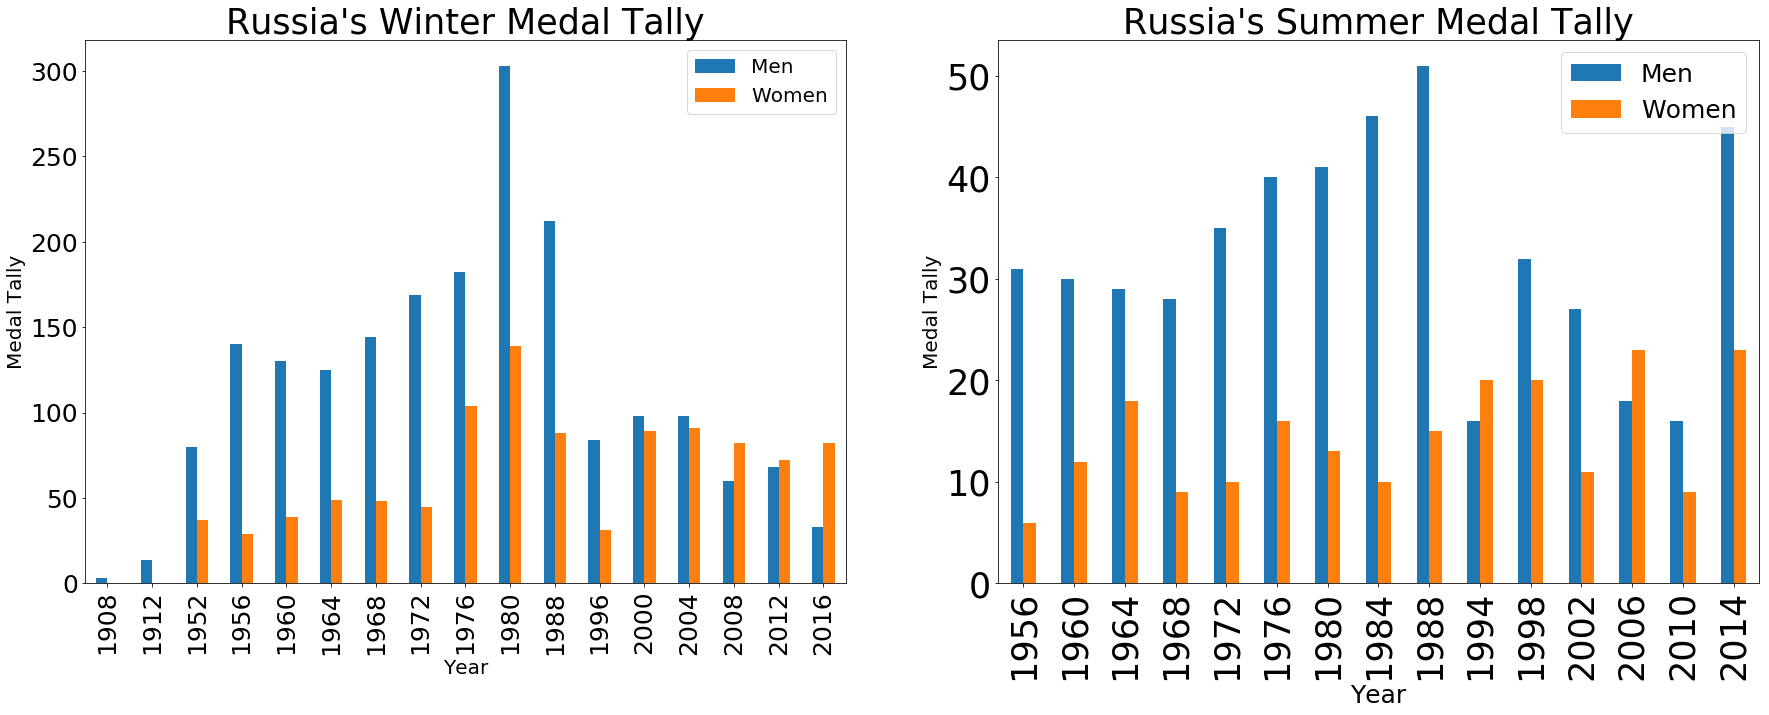

In [15]:
RusMWSummer.plot(kind='bar',
                 ax=plot.subplot(1,2,1),
                 legend=True,
                 figsize=(30,10),
                 fontsize=25)
plot.title("Russia's Winter Medal Tally",fontsize=35)
plot.ylabel("Medal Tally",fontsize=20)
plot.xlabel("Year",fontsize=20)
plot.legend(loc=1,prop={'size': 20})


RusMWWinter.plot(kind='bar',
                 ax=plot.subplot(1,2,2),
                 legend=True,
                 figsize=(30,10),
                 fontsize=35)
plot.title("Russia's Summer Medal Tally",fontsize=35)
plot.ylabel("Medal Tally",fontsize=20)
plot.xlabel("Year",fontsize=25)
plot.legend(loc=1,prop={'size': 25})
plot.show()

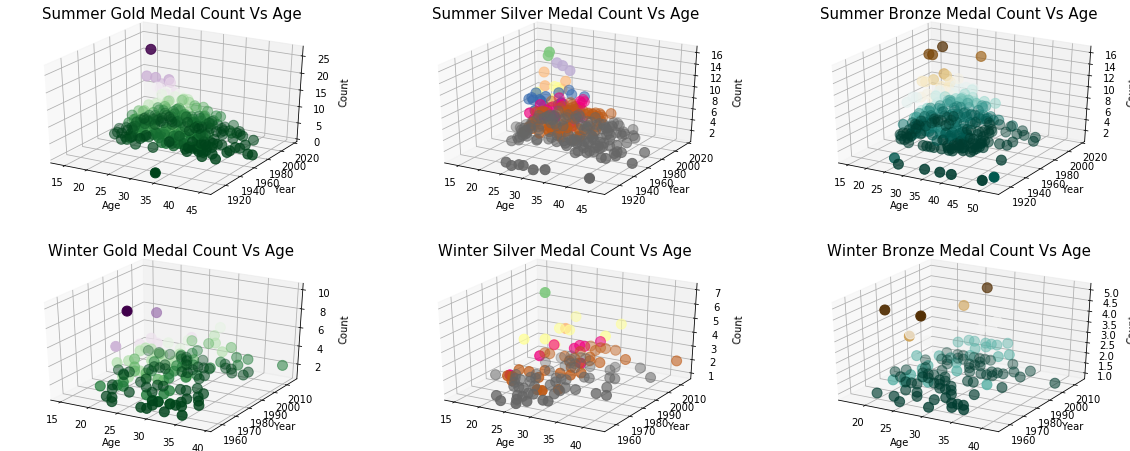

In [71]:
from mpl_toolkits.mplot3d import Axes3D

#ax = fig.add_subplot(1, 2, 1, projection='3d')
fig=plot.figure(figsize=(20,8))
ax=fig.add_subplot(231,projection='3d')
ax.scatter3D(RusSummerGoldMedalAge.Age,
             RusSummerGoldMedalAge.Year,
             RusSummerGoldMedalAge.Count,
             c=RusSummerGoldMedalAge.Count, s=100, cmap='PRGn_r', marker='o');
plot.title("Summer Gold Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)


ax=fig.add_subplot(232,projection='3d')
ax.scatter3D(RusSummerSilverMedalAge.Age,
             RusSummerSilverMedalAge.Year,
             RusSummerSilverMedalAge.Count,
             c=RusSummerSilverMedalAge.Count, s=100, cmap='Accent_r', marker='o');
plot.title("Summer Silver Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)


ax=fig.add_subplot(233,projection='3d')
ax.scatter3D(RusSummerBronzeMedalAge.Age,
             RusSummerBronzeMedalAge.Year,
             RusSummerBronzeMedalAge.Count,
             c=RusSummerBronzeMedalAge.Count, s=100, cmap='BrBG_r', marker='o');
plot.title("Summer Bronze Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)


ax=fig.add_subplot(234,projection='3d')
ax.scatter3D(RusWinterGoldMedalAge.Age,
             RusWinterGoldMedalAge.Year,
             RusWinterGoldMedalAge.Count,
             c=RusWinterGoldMedalAge.Count, s=100, cmap='PRGn_r', marker='o');
plot.title("Winter Gold Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)


ax=fig.add_subplot(235,projection='3d')
ax.scatter3D(RusWinterSilverMedalAge.Age,
             RusWinterSilverMedalAge.Year,
             RusWinterSilverMedalAge.Count,
             c=RusWinterSilverMedalAge.Count, s=100, cmap='Accent_r', marker='o');
plot.title("Winter Silver Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)


ax=fig.add_subplot(236,projection='3d')
ax.scatter3D(RusWinterBronzeMedalAge.Age,
             RusWinterBronzeMedalAge.Year,
             RusWinterBronzeMedalAge.Count,
             c=RusWinterBronzeMedalAge.Count, s=100, cmap='BrBG_r', marker='o');
plot.title("Winter Bronze Medal Count Vs Age",fontsize=15)
ax.set_ylabel("Year",fontsize=10)
ax.set_xlabel("Age",fontsize=10)
ax.set_zlabel("Count",fontsize=10)

plot.show()
             

# Reading the file
1. We read the csv file into pandas DataFrame
2. We then check the size of the DataFrame.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Read the csv data for regression.
census_raw = pd.read_csv('acs2015_census_tract_data.csv',delimiter=',')

# check the size of the data before preprocessing
size_raw = census_raw.shape
print("The size of the original data frame w/o pre-processing",size_raw)


The size of the original data frame w/o pre-processing (74001, 37)


In [54]:
# Read the csv data for classification

avocado_raw = pd.read_csv('avocado.csv',delimiter=',',index_col ="region")



# Check the size of the data before pre-processing
size_av = avocado_raw.shape
print("The size of the original data frame without pre-processing",size_av)

The size of the original data frame without pre-processing (18249, 13)


# DATA PREPROCESSING
1. Data pre processing. Since there are NaN values in some of the columns we will remove it.
2. We will calculate the total number of NaN values for each column in the dataset 
2. Since every columns has something important we will drop the column that has the highest NaN and see if the total rows doesn't drop considerbly.
3. If the rows doesn't drop considerably and there are no more NaN we can use that as our dataset.
4. If the rows drop considerably to the original size or there are still considerable about of NaN then we will perform data-imputation on the dataset.
5. Perform Data Transformation, Modification to get the results needed to plot.


### Get the count of NaN for all columns and see which one has the highest NaN'.s

In [32]:

census_raw.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

In [51]:
avocado_raw.isnull().sum()

Unnamed: 0            0
Date                  0
AveragePrice          0
Total Volume          0
Volume of PLU 4046    0
Volume of PLU 4225    0
Volume of PLU 4770    0
Total Bags            0
Small Bags            0
Large Bags            0
XLarge Bags           0
type                  0
year                  0
region                0
dtype: int64

In [56]:
avocado_raw.drop(["TotalUS","West",""], inplace = True)

### Since ChildPoverty column has the highest number of NaN's.We will remove all the rows where ChildPoverty==NaN

In [33]:
census_raw = census_raw[pd.notnull(census_raw['ChildPoverty'])]
# Get the count of NaN for all columns.
census_raw.isnull().sum()

CensusTract          0
State                0
County               0
TotalPop             0
Men                  0
Women                0
Hispanic             0
White                0
Black                0
Native               0
Asian                0
Pacific              0
Citizen              0
Income             135
IncomeErr          135
IncomePerCap         9
IncomePerCapErr      9
Poverty              0
ChildPoverty         0
Professional         3
Service              3
Office               3
Construction         3
Production           3
Drive                3
Carpool              3
Transit              3
Walk                 3
OtherTransp          3
WorkAtHome           3
MeanCommute         66
Employed             0
PrivateWork          3
PublicWork           3
SelfEmployed         3
FamilyWork           3
Unemployment         2
dtype: int64

### We will perform a simple data imputation technique now to have all the values. Calculate the median and mean of the columns and fill it using pandas. 
    1. Income colums are usually more closely associated with median 
    2. Other counts like people in different sectors are closely associated with mean.


## Median

In [34]:
colMed = ["Income","IncomeErr","IncomePerCap","IncomePerCapErr"]
median = census_raw[colMed].median(axis=0) #along columns.
median

Income             51103.5
IncomeErr           7735.0
IncomePerCap       25366.0
IncomePerCapErr     3128.0
dtype: float64

## Mean

In [35]:
colMean = ["Professional","Service","Office","Construction","Production",
       "Drive","Carpool","Transit","Walk","OtherTransp","WorkAtHome",
       "MeanCommute","PrivateWork","PublicWork","SelfEmployed",
       "FamilyWork","Unemployment"]
mean = census_raw[colMean].mean(axis=0) #along columns.
mean

Professional    34.806319
Service         19.079605
Office          23.925907
Construction     9.312268
Production      12.876013
Drive           75.660508
Carpool          9.637492
Transit          5.451962
Walk             3.034628
OtherTransp      1.884372
WorkAtHome       4.331489
MeanCommute     25.688429
PrivateWork     78.993396
PublicWork      14.606911
SelfEmployed     6.230070
FamilyWork       0.170022
Unemployment     9.013610
dtype: float64

## Fill median to the dataset of missing values in it's columns.

In [36]:
census_raw.fillna(median,inplace=True);

## Fill mean to the dataset of missing values in it's columns.

In [37]:
census_raw.fillna(mean,inplace=True);

## Verify there are no more NaN's in the DF.

In [38]:
census_raw.isnull().sum()

CensusTract        0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

## Data Transformation

In [39]:
StateIncome = census_raw.groupby('State').apply(lambda x: x['Income'].sum()/len(x))
StateEthinicity = census_raw.groupby('State').apply(lambda x: x[['Hispanic','White','Black','Native','Asian','Pacific']].sum()/len(x))
StateGender = census_raw.groupby('State').apply(lambda x: x[['Men','Women']].sum()/len(x))
StateGenderPer = pd.concat([StateGender['Men']*100/StateGender.sum(1), StateGender['Women']*100/StateGender.sum(1)], axis=1,keys=['Men','Women'])
StateWorkDistribution = census_raw.groupby('State').apply(lambda x: x[['PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment']].sum()/len(x))
StateWorkingCategory = census_raw.groupby('State').apply(lambda x: x[['Professional','Service','Office','Construction','Production']].sum()/len(x))



NationalEthinicity = StateEthinicity.sum()/len(StateEthinicity)
NationalGenderPer = StateGenderPer.sum()/len(StateGenderPer)
NationalWorkDist = StateWorkDistribution.sum()/len(StateWorkDistribution)
NationalWorkingCat = StateWorkingCategory.sum()/len(StateWorkingCategory)




# DATA VIZUALIZATION

### Per State Ethinicity Measue

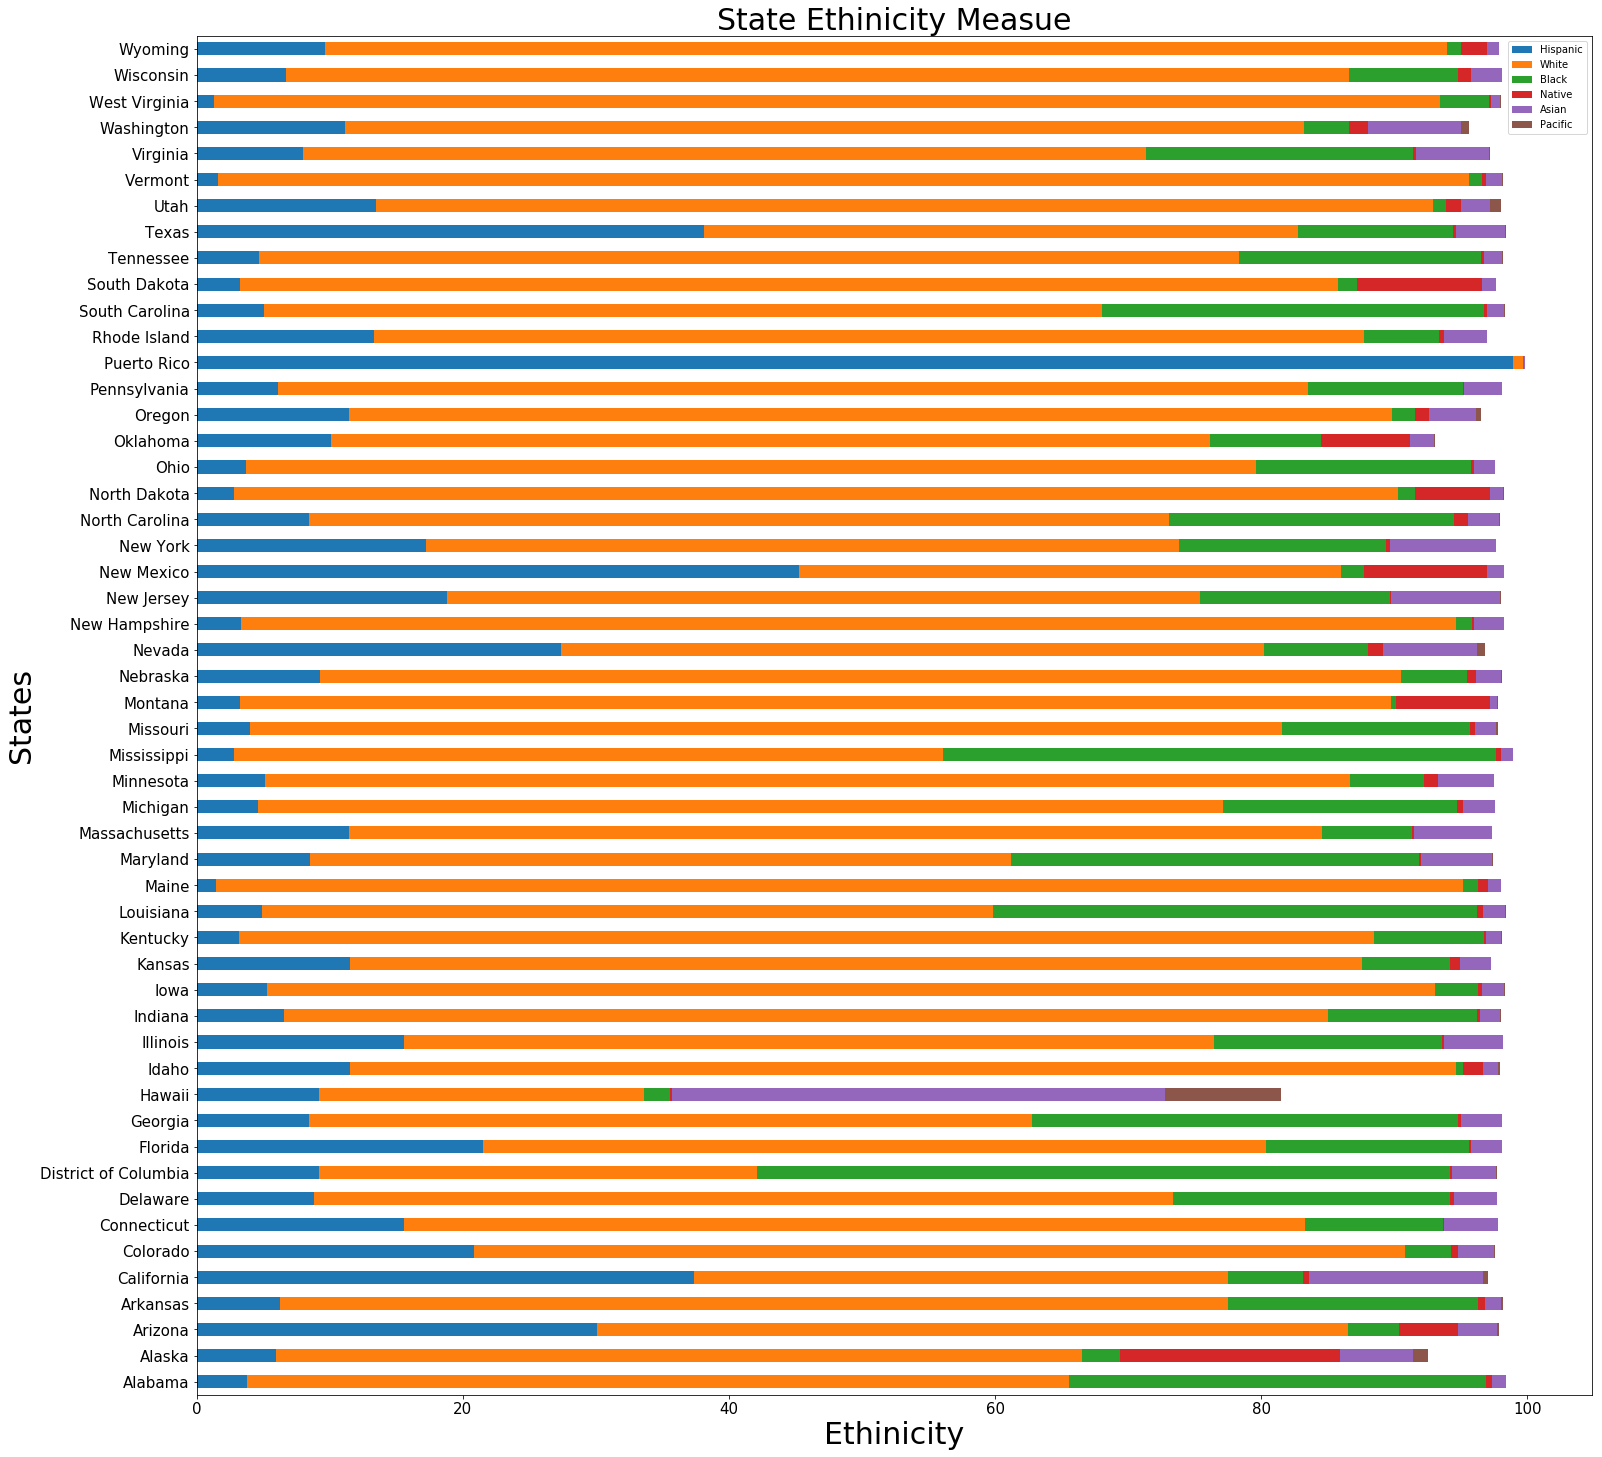

In [26]:
StateEthinicity.plot(kind='barh',stacked=True,figsize=(25,25),fontsize=15)
plot.title('State Ethinicity Measue',fontsize=30)
plot.ylabel("States",fontsize=30)
plot.xlabel("Ethinicity",fontsize=30)
plot.show()

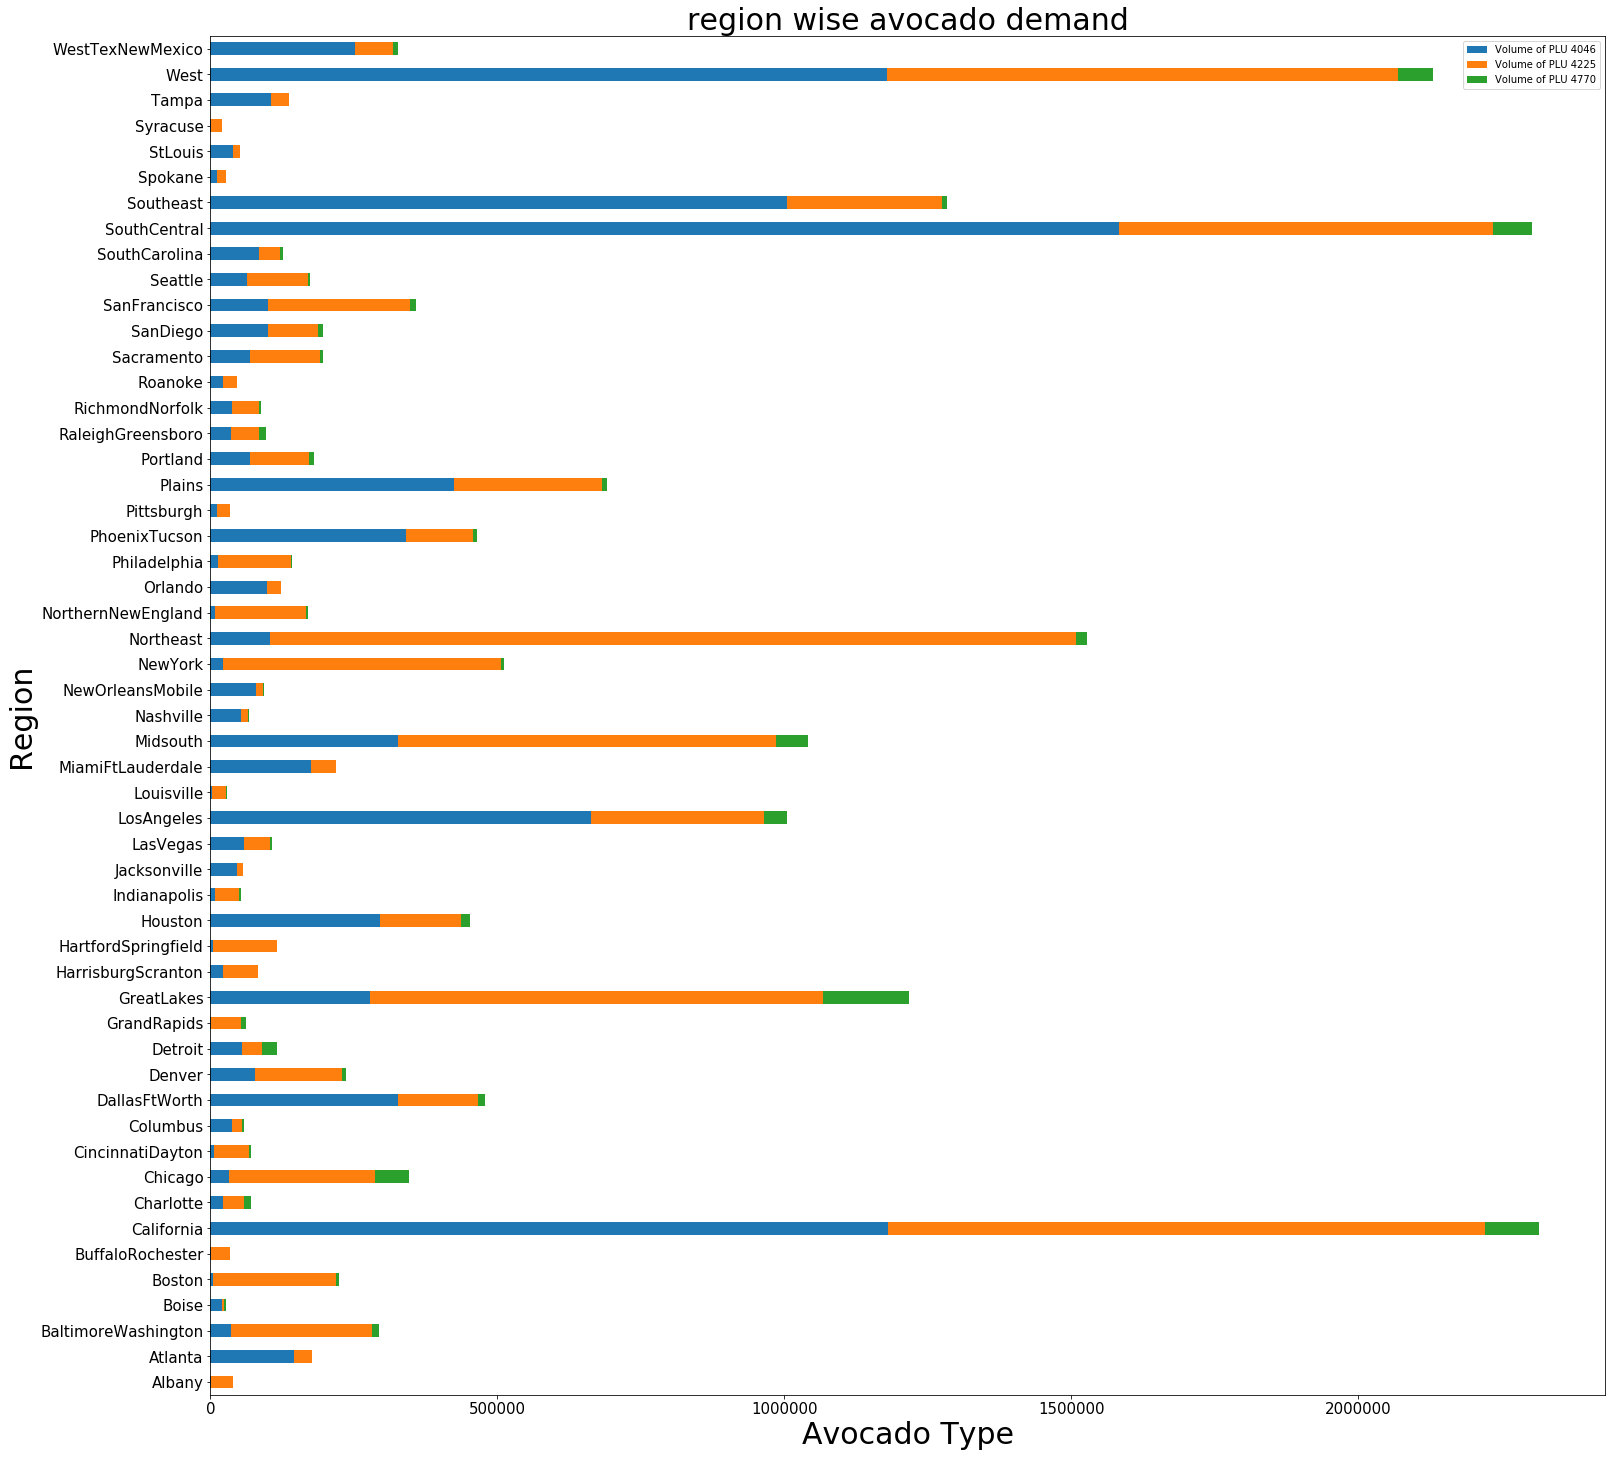

In [62]:
CityAvocado = avocado_raw.groupby('region').apply(lambda x: x[['Volume of PLU 4046','Volume of PLU 4225','Volume of PLU 4770']].sum()/len(x))

CityAvocado.plot(kind='barh',stacked='true',figsize=(25,25),fontsize=15)
plot.title('region wise avocado demand',fontsize=30)
plot.ylabel("Region",fontsize=30)
plot.xlabel("Avocado Type",fontsize=30)
plot.show()

### National Ethinicity Measure

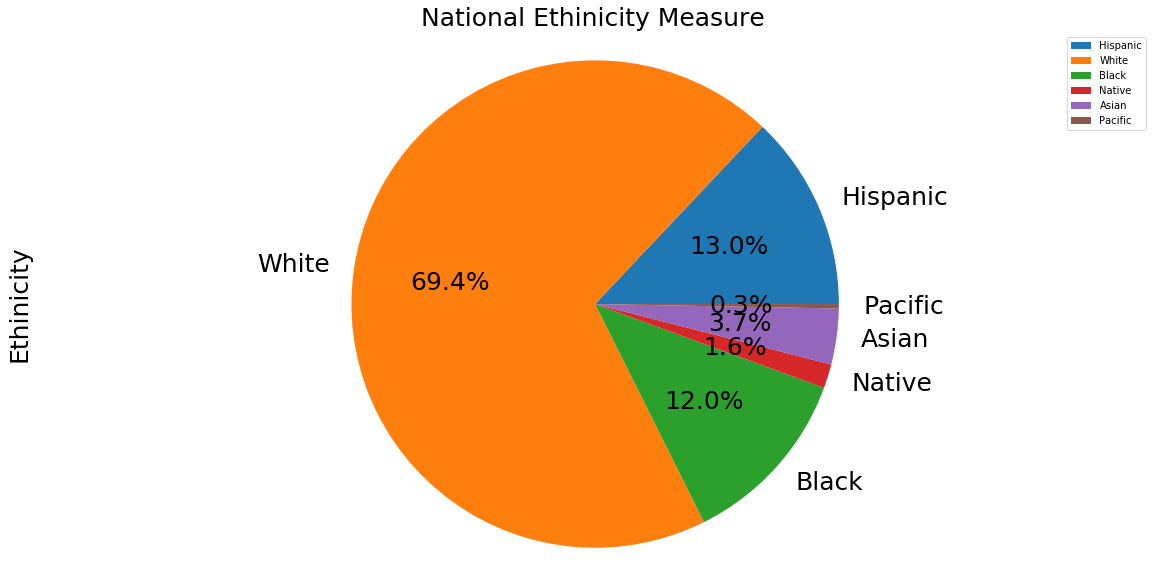

In [27]:
NationalEthinicity.plot(kind='pie',
                        figsize=(20,10),
                        labels=NationalEthinicity.index,
                        autopct='%1.1f%%',
                        legend=True,
                        fontsize=25,
                        table=False)

plot.axis('equal')
plot.title('National Ethinicity Measure',fontsize=25)
plot.ylabel("Ethinicity",fontsize=25)
plot.show()

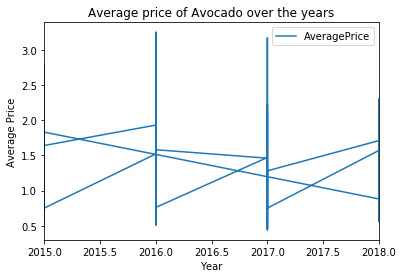

In [70]:
# yearAvg = avocado_raw.groupby('Type').apply(lambda x: x['Income'].sum()/len(x))
# StateIncome.plot(kind='area',figsize=(34,13),rot='vertical',fontsize=25,legend=False,color='green')

# plot.title('State Wise Income',fontsize=35)
# plot.ylabel("Income",fontsize=35)
# plot.xlabel("States",fontsize=35)
# plot.xticks(range(len(StateIncome.index.values)),StateIncome.index.values)
# plot.show()

avocado_raw.plot(kind = 'line', x = 'year', y = 'AveragePrice')
plot.xlabel('Year')
plot.ylabel('Average Price')
plot.title("Average price of Avocado over the years")
plot.show()

### Per State Gender Percentage

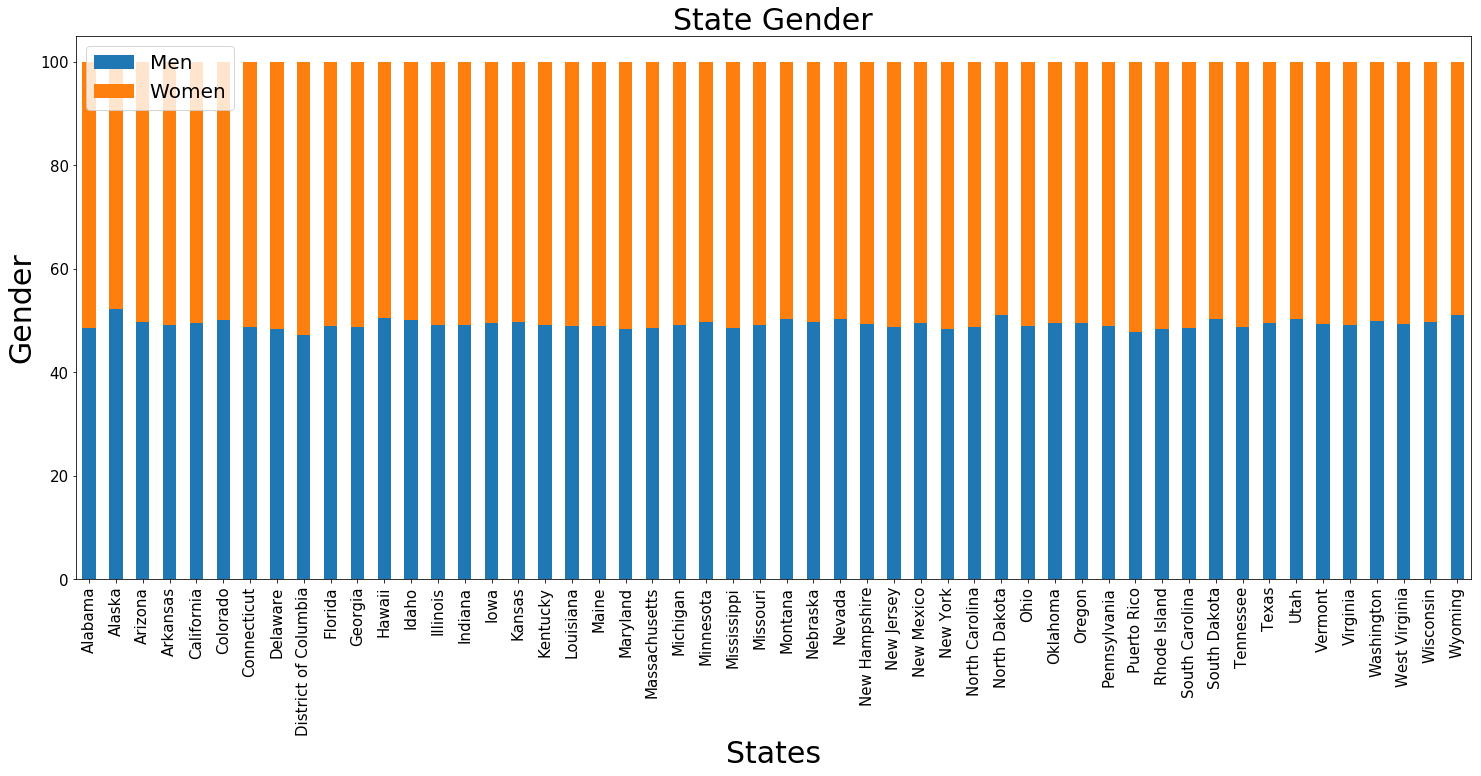

In [28]:
StateGenderPer.plot(kind='bar',stacked=True,figsize=(25,10),fontsize=15)
plot.title('State Gender',fontsize=30)
plot.ylabel("Gender",fontsize=30)
plot.xlabel("States",fontsize=30)
plot.legend(loc=2, prop={'size': 20})
plot.show()

### Average Income Per State.

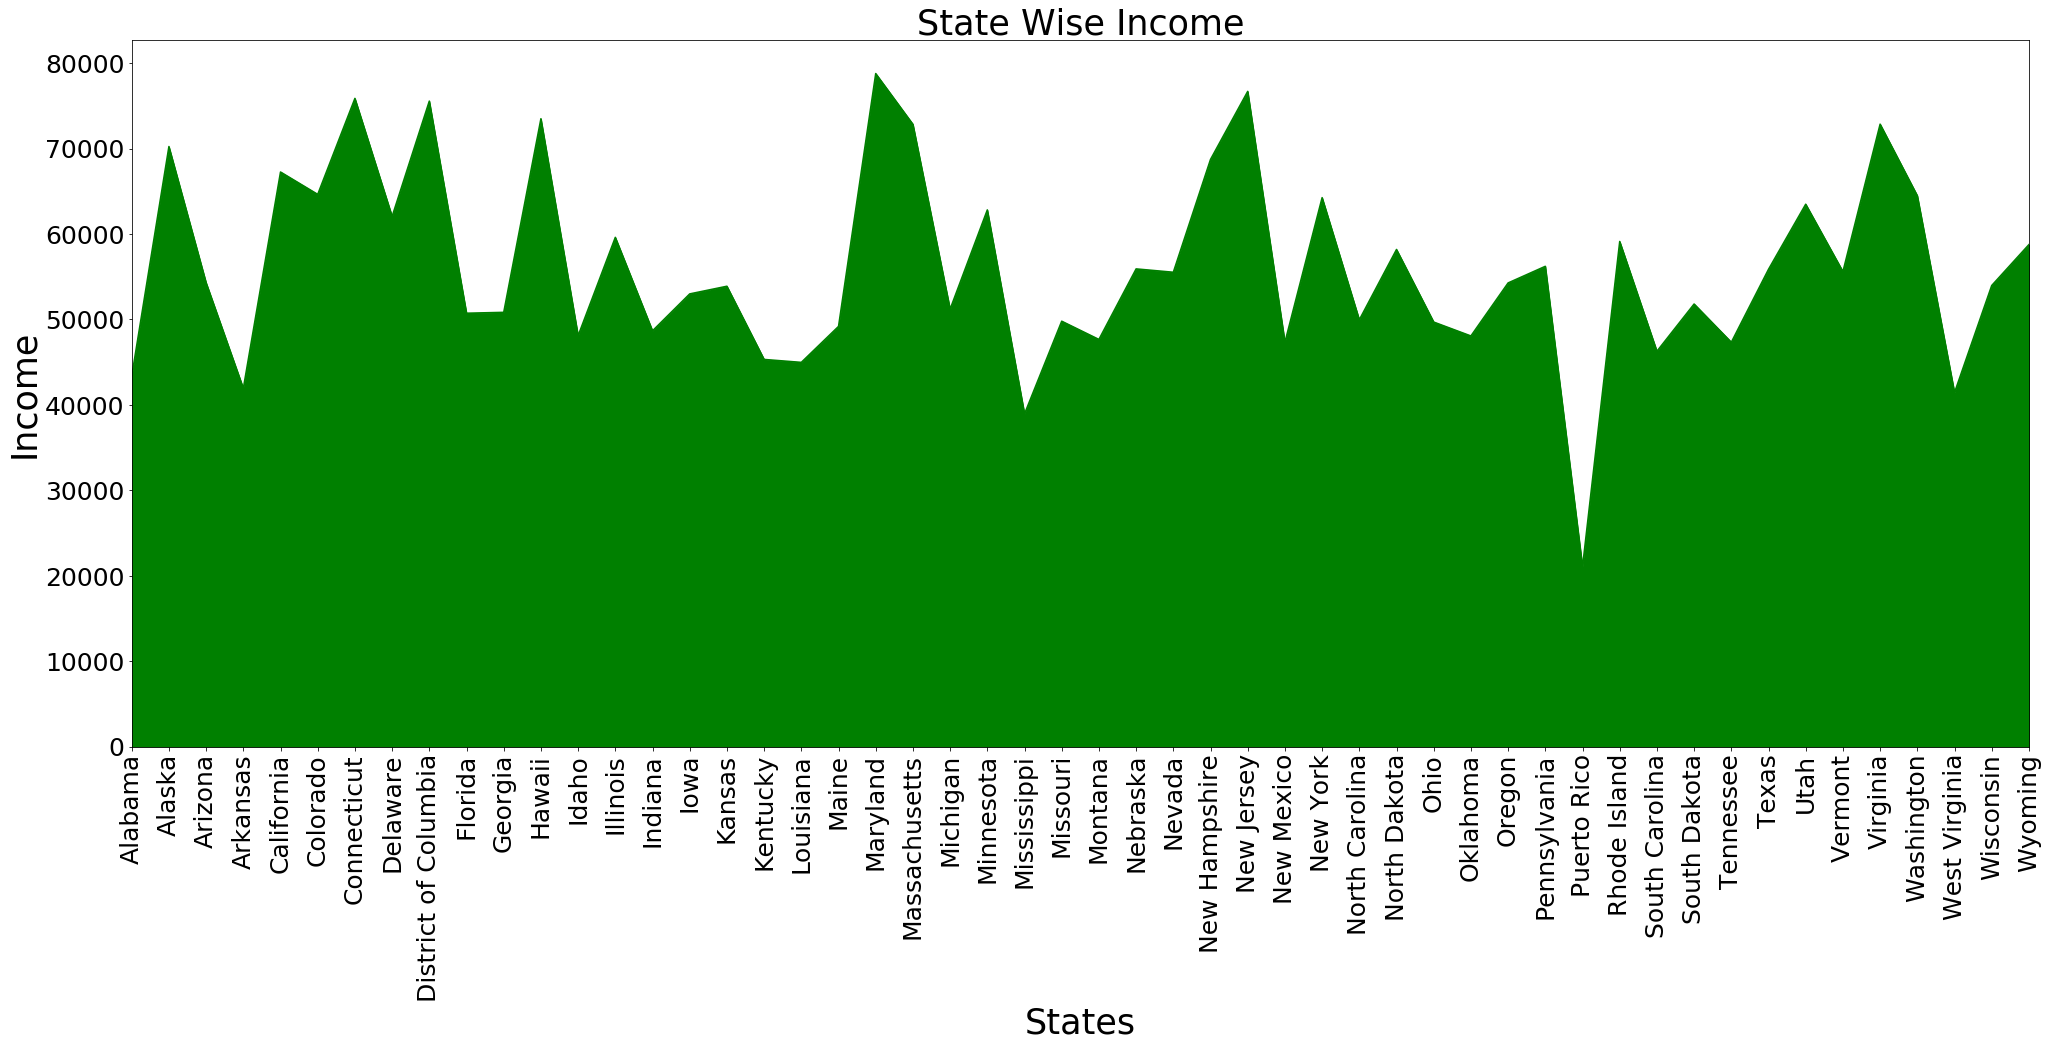

In [29]:
StateIncome.plot(kind='area',figsize=(34,13),rot='vertical',fontsize=25,legend=False,color='green')

plot.title('State Wise Income',fontsize=35)
plot.ylabel("Income",fontsize=35)
plot.xlabel("States",fontsize=35)
plot.xticks(range(len(StateIncome.index.values)),StateIncome.index.values)
plot.show()

### Work Distribution Per State.

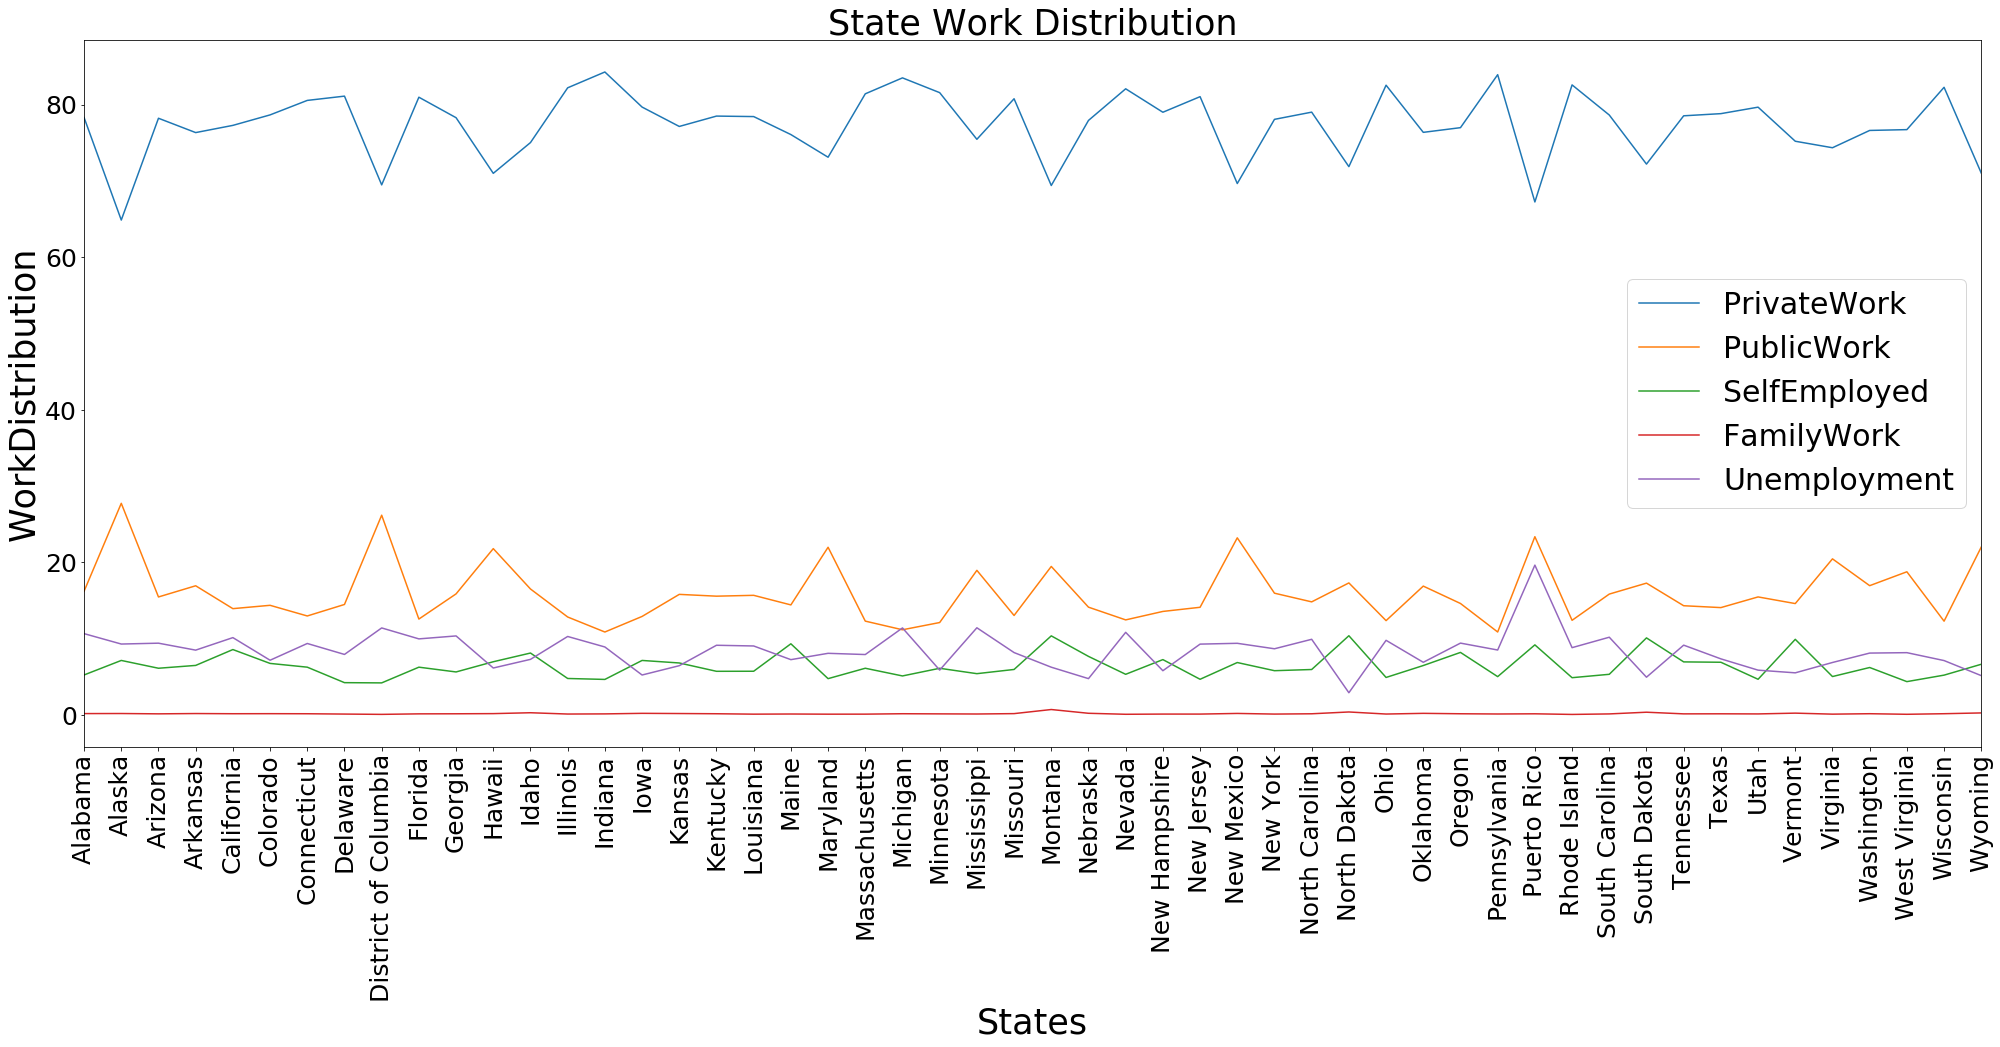

In [40]:
StateWorkDistribution.plot(kind='line',figsize=(34,13),rot='vertical',fontsize=25)

plot.title('State Work Distribution',fontsize=35)
plot.ylabel("WorkDistribution",fontsize=35)
plot.xlabel("States",fontsize=35)
plot.xticks(range(len(StateWorkDistribution.index.values)),StateWorkDistribution.index.values)
plot.legend(loc=5, prop={'size': 30})
plot.show()

### State Working Category for Private Sector

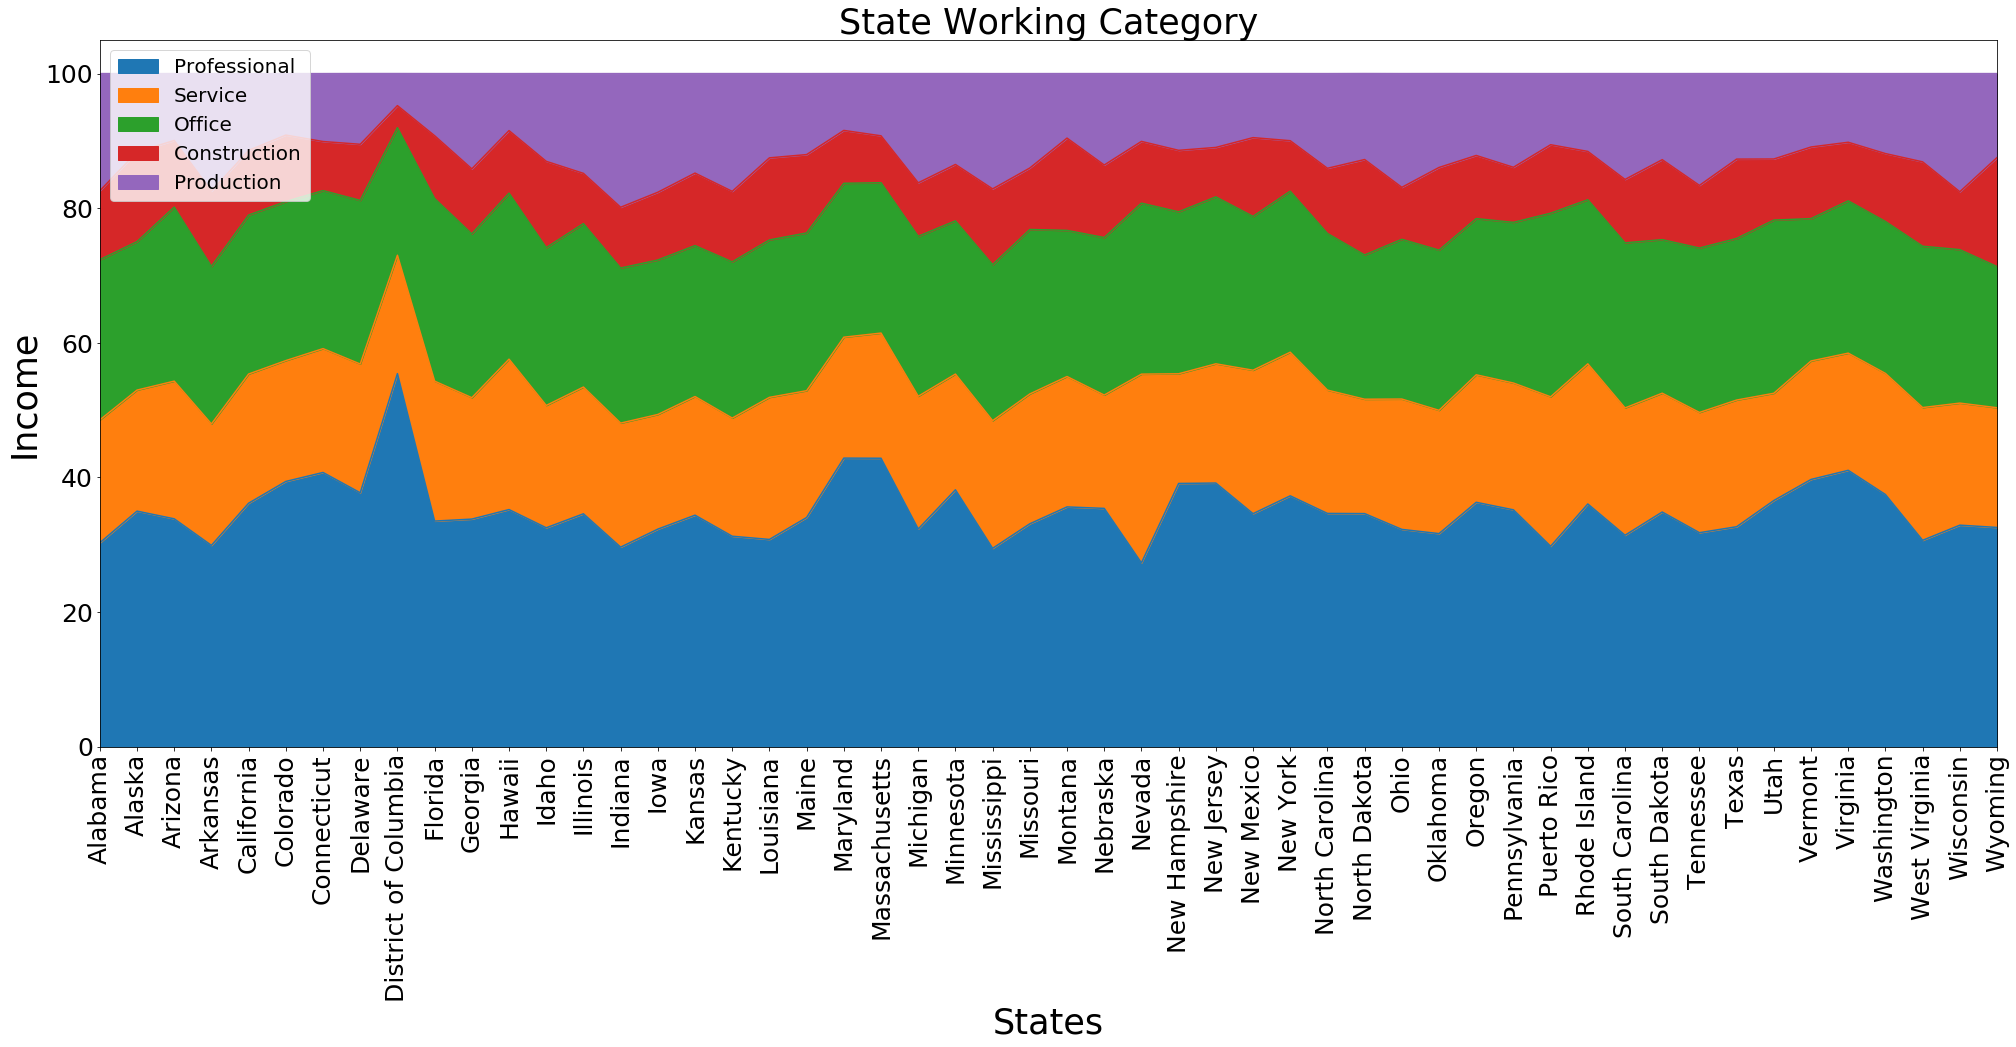

In [41]:
StateWorkingCategory.plot(kind='area',figsize=(34,13),rot='vertical',fontsize=25,legend=True)
plot.title('State Working Category',fontsize=35)
plot.ylabel("Income",fontsize=35)
plot.xlabel("States",fontsize=35)
plot.xticks(range(len(StateWorkingCategory.index.values)),StateWorkingCategory.index.values)
plot.legend(loc=2, prop={'size': 20})
plot.show()

### National Work Distribution and National Working Category for Private Sector

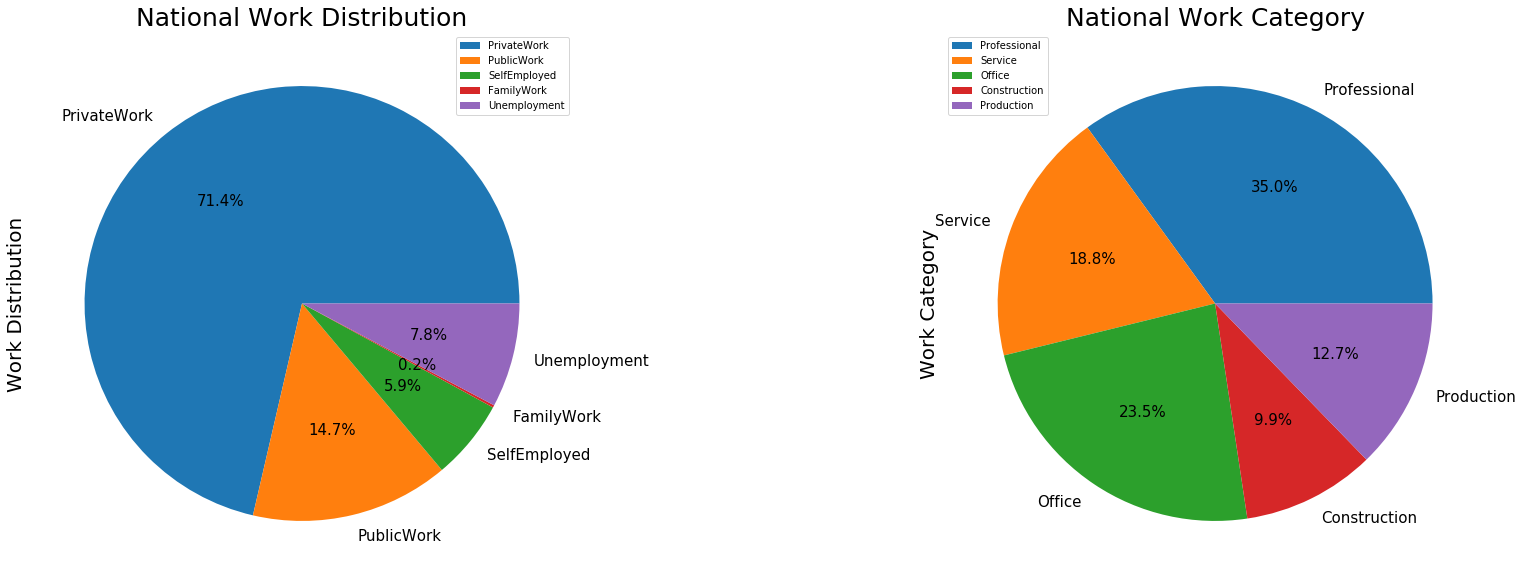

In [44]:
plot.subplot(1, 2, 1)
NationalWorkDist.plot(kind='pie',
                      figsize=(30,10),
                      fontsize=15,
                      labels=NationalWorkDist.index,
                      autopct='%1.1f%%',legend=True)

plot.title('National Work Distribution',fontsize=25)
plot.ylabel("Work Distribution",fontsize=20)


plot.subplot(1, 2, 2)
NationalWorkingCat.plot(kind='pie',
                      figsize=(30,10),
                      fontsize=15,
                      labels=NationalWorkingCat.index,
                      autopct='%1.1f%%',legend=True)

plot.title('National Work Category',fontsize=25)

plot.ylabel("Work Category",fontsize=20)
plot.show()



### Conclusion
Discuss the challenges or somethat that you learned. If you have any suggestion about the assignment, you can write about it.

### References
List your references here... Follow either MLA or APA style!